## Adding Random Noise and Denoising of an image
1. Image is taken as input using PIL.
2. A random position in the 2D matrix of pixel for each channel is generated and filled with a random value in [0-255].
3. Denoising is done by using 8 way neighbour comparisions of each pixel and replacing it with the median/mean score if needed i.e. noise detected. 

In [53]:
import pandas as pd
import numpy as np
import PIL
import random
import statistics
import matplotlib.pyplot as plt

(510, 1020, 3)


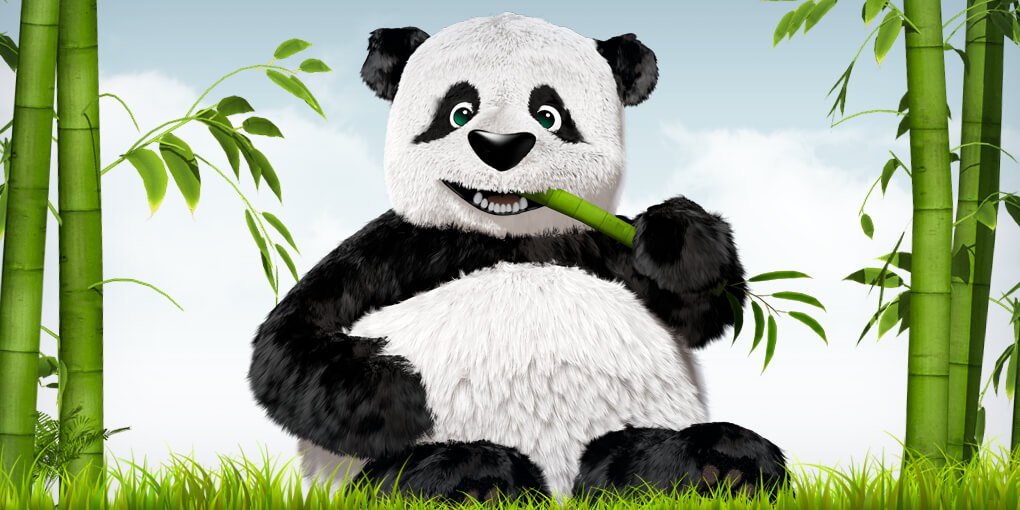

In [54]:
#PIL Library for image input
im = PIL.Image.open('/content/10.jpg')
dat = np.asarray(im)
#Copy the 3d array so as to preserve the original image pixel value
datax = dat.copy()
print(datax.shape)
im

In [55]:
#Generate noise in 2% of randomly selected pixels (size given cor).
#Choose x,y,i randomly and fill it using the random pixel generator 
col, row = im.size[:2]
cor = (2*col*row)/100
cor = cor*3
for a in range(0,int(cor)):
  pix = random.randint(0,255)
  x = random.randint(0,row-1)
  y = random.randint(0,col-1)
  i = random.randint(0,2)
  datax[x,y,i] = pix

### Noisy Image

'Noisy Image'

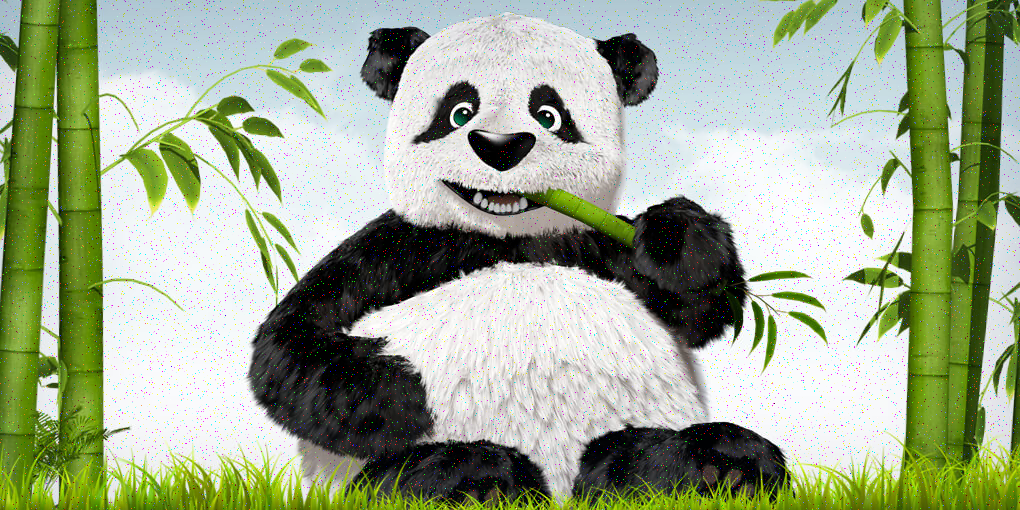

In [56]:
im2 = PIL.Image.fromarray(datax)
display("Noisy Image")
display(im2)

In [57]:
data = datax.copy()
d = datax.copy()

In [58]:
#For each channel we transverse through all the elements of the 2d matrix.
#We make eight simultaneous comparisions with 8 adjacent neighbours
#The threshold is set by thres and we keep the count of how many times the threshold is exceeded.
#If the threshold is exceeded for all the neighbours we replace the pixel value with mean/median.
#Same process is repeated for all the other channels.
z=0
while(z<3):
  for i in range(1,row-1):
    for y in range(1,col-1):
      count = 0
      thres = 5
      a = int(data[i,y,z])
      p1=int(data[i,y+1,z])
      p2=int(data[i,y-1,z])
      p3=int(data[i+1,y,z])
      p4=int(data[i-1,y,z])
      p5=int(data[i+1,y+1,z])
      p6=int(data[i-1,y+1,z])
      p7=int(data[i+1,y-1,z])
      p8=int(data[i-1,y-1,z])

      if(abs(a-p1)>thres and abs(a-p2)>thres and abs(a-p3)>thres and abs(a-p4)>thres and abs(a-p5)>thres and abs(a-p6)>thres and abs(a-p7)>thres and abs(a-p8)>thres):
        medianx = statistics.median([p1,p2,p3,p4,p5,p6,p7,p8])
        meanx = statistics.mean([p1,p2,p3,p4,p5,p6,p7,p8])
        data[i,y,z] = medianx
        d[i,y,z] = meanx
  z = z+1

'Original Image'

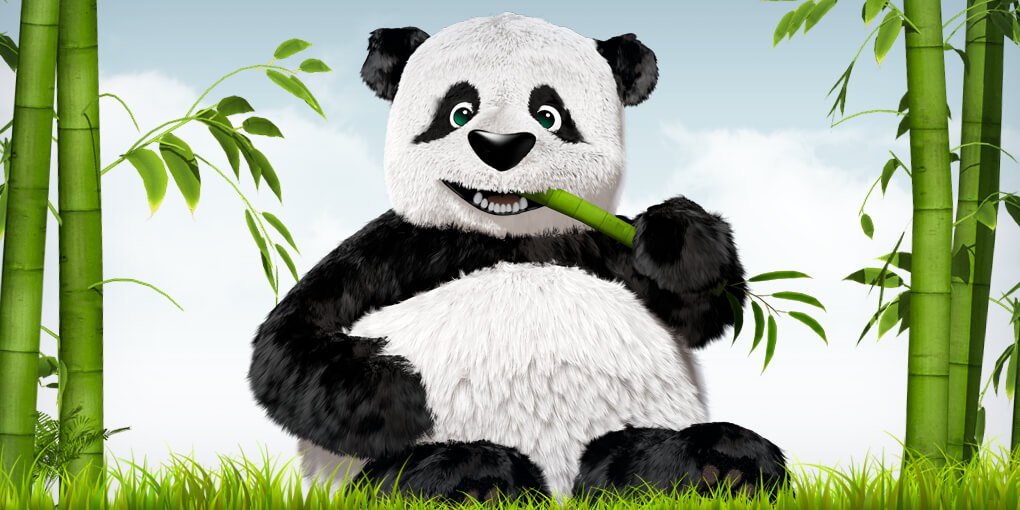

'Noisy Image'

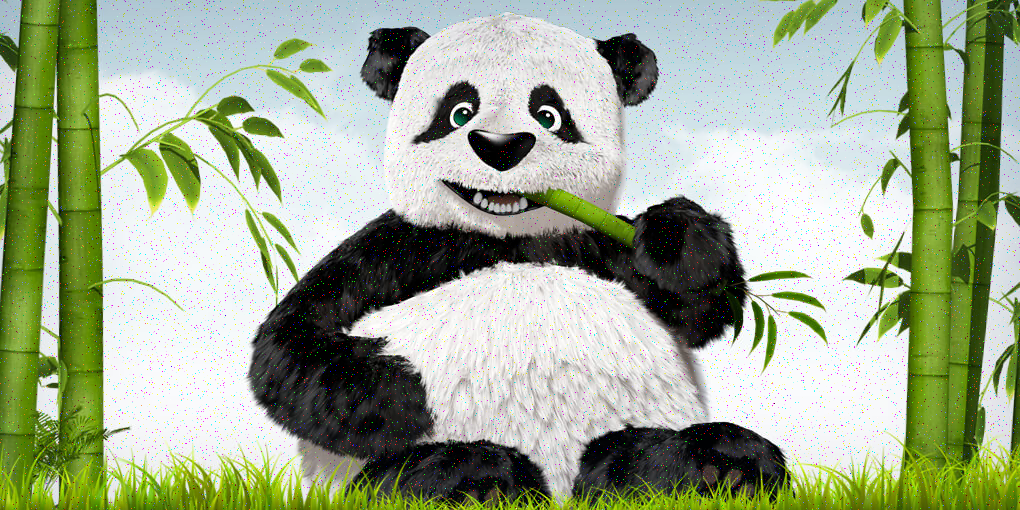

'Denoised Image using Median'

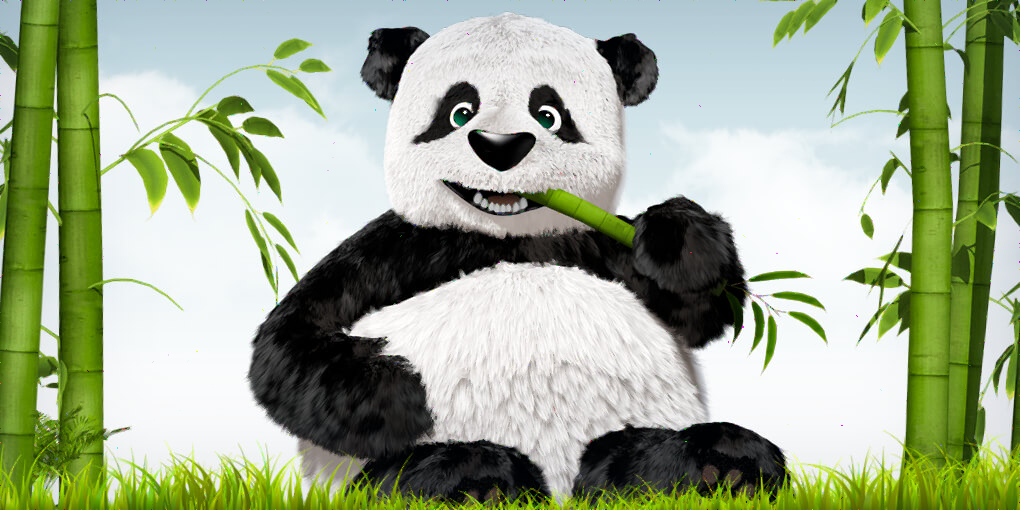

'Denoised Image using Mean'

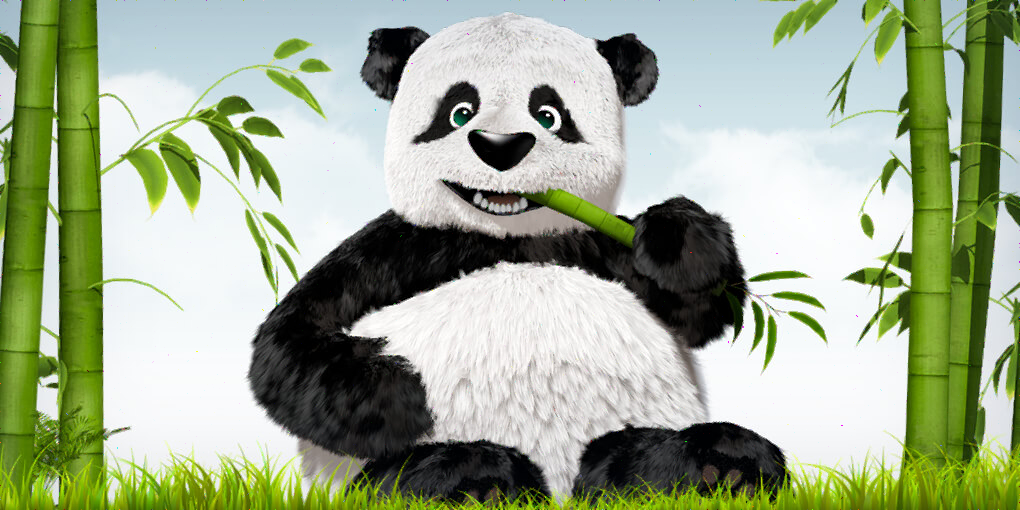

In [61]:
display('Original Image')
display(im)
display('Noisy Image')
display(im2)
im3 = PIL.Image.fromarray(data)
display('Denoised Image using Median')
display(im3)
im4 = PIL.Image.fromarray(d)
display('Denoised Image using Mean')
display(im4)


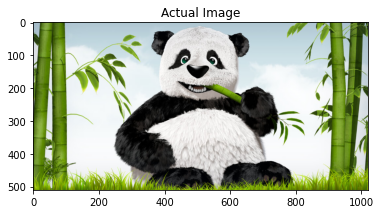

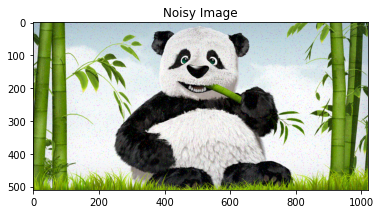

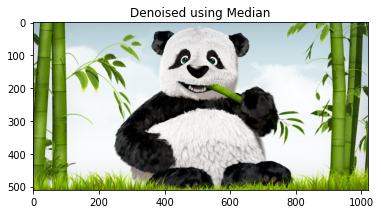

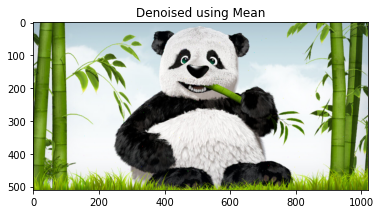

In [52]:
plt.title('Actual Image')
plt.imshow(im)
plt.show()
plt.title('Noisy Image')
plt.imshow(im2)
plt.show()
plt.title('Denoised using Median')
plt.imshow(im3)
plt.show()
plt.title('Denoised using Mean')
plt.imshow(im4)
plt.show()